In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import glob
import os

In [3]:
# Ruta de los archivos JSON
ruta = r"C:\Users\User\Desktop\SOYHENRY\Trabajo Grupal\Dataset\Google\reviews-estados\review-New_York"

# Lista de archivos JSON en la carpeta
archivos_json = glob.glob(os.path.join(ruta, "*.json"))

# Cargar los JSON correctamente
df_list = []
for archivo in archivos_json:
    try:
        df_temp = pd.read_json(archivo, lines=True)  # Usa lines=True para JSON línea por línea
        df_list.append(df_temp)
    except ValueError as e:
        print(f"Error al leer {archivo}: {e}")

# Concatenar los dataframes
df = pd.concat(df_list, ignore_index=True)

In [4]:
df.head()

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.137221e+20,Alvin Martinez,1603494795361,5,I'm late to posting this but this store especi...,[{'url': ['https://lh5.googleusercontent.com/p...,None,0x89c25fc9494dce47:0x6d63c807b59a55
1,1.072934e+20,Johnnie Jackson,1620157037403,1,Very dissatisfied I did not get my phone the p...,None,"{'time': 1620268360920, 'text': 'We pride ours...",0x89c25fc9494dce47:0x6d63c807b59a55
2,1.003786e+20,Manie Blazer,1597431662039,5,Excellent very well done with professional car...,None,None,0x89c25fc9494dce47:0x6d63c807b59a55
3,1.149982e+20,Fashion Fiinds,1543773862044,5,Basing my review strictly on the service I rec...,None,"{'time': 1543855317372, 'text': 'Thanks for th...",0x89c25fc9494dce47:0x6d63c807b59a55
4,1.171782e+20,Andres Rieloff,1597279097718,1,Bad! Disorganized. I'm being totally honest. I...,None,None,0x89c25fc9494dce47:0x6d63c807b59a55


In [5]:
# Cantidad de filas y columnas
df.shape

(2700000, 8)

In [6]:
# Ver los tipos de datos de cada columna
print(df.dtypes)

user_id    float64
name        object
time         int64
rating       int64
text        object
pics        object
resp        object
gmap_id     object
dtype: object


In [7]:
df.columns

Index(['user_id', 'name', 'time', 'rating', 'text', 'pics', 'resp', 'gmap_id'], dtype='object')

In [8]:
# Convertir las columnas  a tipo 'string'
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('string')

In [9]:
df.duplicated().sum()

59337

In [10]:
# Filas duplicadas
duplicadas = df[df.duplicated(keep=False)]

# Ordenamos por todas las columnas para que se vean juntas
duplicadas = duplicadas.sort_values(by=df.columns.tolist())

# Mostramos el resultado
print(duplicadas)

              user_id             name           time  rating  \
433190   1.000013e+20   Daisy Crawford  1562613047637       5   
433191   1.000013e+20   Daisy Crawford  1562613047637       5   
519864   1.000014e+20     Matt Solomon  1502904476201       5   
519873   1.000014e+20     Matt Solomon  1502904476201       5   
2417594  1.000015e+20  Anthony Puglisi  1550149671999       4   
...               ...              ...            ...     ...   
357900   1.184462e+20    Jonathan Fung  1569217448412       5   
1201332  1.184465e+20      Chinh Chinh  1529017525510       4   
1201335  1.184465e+20      Chinh Chinh  1529017525510       4   
1855121  1.184466e+20      Alec Holden  1584810613275       5   
1855122  1.184466e+20      Alec Holden  1584810613275       5   

                                                      text  \
433190   Close by authentic Chinese food. Place is not ...   
433191   Close by authentic Chinese food. Place is not ...   
519864                           

In [11]:
# Eliminar filas duplicadas
df = df.drop_duplicates()

In [12]:
# Verificar la cantidad de valores nulos por columna
df.isnull().sum()

user_id          0
name             0
time             0
rating           0
text       1159136
pics       2543929
resp       2382863
gmap_id          0
dtype: int64

In [13]:
# Estadísticas descriptivas para columnas numéricas
df.describe() 

,user_id,time,rating
count,2.640663e+06,2.640663e+06,2.640663e+06
mean,1.092969e+20,1.551473e+12,4.303740e+00
std,5.265431e+18,4.548452e+10,1.113559e+00
min,1.000000e+20,6.626016e+11,1.000000e+00
25%,1.047602e+20,1.524690e+12,4.000000e+00
50%,1.092882e+20,1.555425e+12,5.000000e+00
75%,1.138531e+20,1.581127e+12,5.000000e+00
max,1.184467e+20,1.631067e+12,5.000000e+00


In [14]:
outliers = pd.DataFrame()

for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    outliers_col = df[(df[col] < lim_inf) | (df[col] > lim_sup)]
    outliers = pd.concat([outliers, outliers_col])

print(f"Total de outliers detectados: {len(outliers)}")

Total de outliers detectados: 264350


In [15]:
# Ver de qué columnas vienen los outliers
for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    cantidad = df[(df[col] < lim_inf) | (df[col] > lim_sup)].shape[0]
    print(f"{col}: {cantidad} outliers")

user_id: 0 outliers
time: 37523 outliers
rating: 226827 outliers


In [16]:
df['fecha'] = pd.to_datetime(df['time'], unit='ms')
print("\nFechas convertidas:\n", df[['time', 'fecha']].head())


Fechas convertidas:
             time                   fecha
0  1603494795361 2020-10-23 23:13:15.361
1  1620157037403 2021-05-04 19:37:17.403
2  1597431662039 2020-08-14 19:01:02.039
3  1543773862044 2018-12-02 18:04:22.044
4  1597279097718 2020-08-13 00:38:17.718


In [17]:
df.head()

,user_id,name,time,rating,text,pics,resp,gmap_id,fecha
0,1.137221e+20,Alvin Martinez,1603494795361,5,I'm late to posting this but this store especi...,[{'url': ['https://lh5.googleusercontent.com/p...,<NA>,0x89c25fc9494dce47:0x6d63c807b59a55,2020-10-23 23:13:15.361
1,1.072934e+20,Johnnie Jackson,1620157037403,1,Very dissatisfied I did not get my phone the p...,<NA>,"{'time': 1620268360920, 'text': 'We pride ours...",0x89c25fc9494dce47:0x6d63c807b59a55,2021-05-04 19:37:17.403
2,1.003786e+20,Manie Blazer,1597431662039,5,Excellent very well done with professional car...,<NA>,<NA>,0x89c25fc9494dce47:0x6d63c807b59a55,2020-08-14 19:01:02.039
3,1.149982e+20,Fashion Fiinds,1543773862044,5,Basing my review strictly on the service I rec...,<NA>,"{'time': 1543855317372, 'text': 'Thanks for th...",0x89c25fc9494dce47:0x6d63c807b59a55,2018-12-02 18:04:22.044
4,1.171782e+20,Andres Rieloff,1597279097718,1,Bad! Disorganized. I'm being totally honest. I...,<NA>,<NA>,0x89c25fc9494dce47:0x6d63c807b59a55,2020-08-13 00:38:17.718


# Analisis de Rating

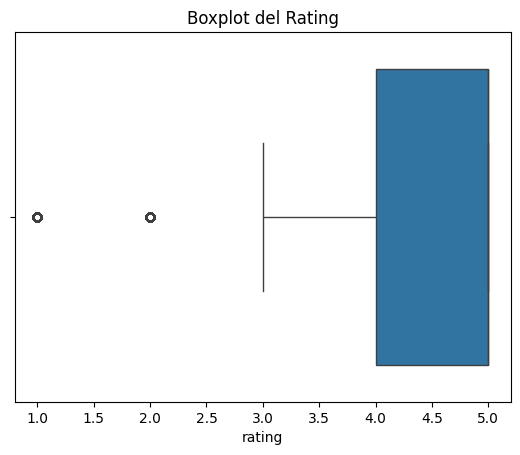

In [18]:
sns.boxplot(x='rating', data=df)
plt.title('Boxplot del Rating')
plt.show()

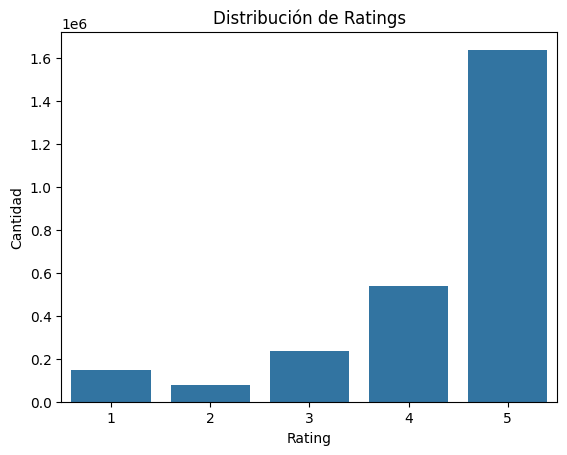

In [19]:
sns.countplot(x='rating', data=df)
plt.title('Distribución de Ratings')
plt.xlabel('Rating')
plt.ylabel('Cantidad')
plt.show()

In [20]:
# Contar cantidad de cada rating
rating_counts = df['rating'].value_counts().sort_index()

# Calcular porcentaje
rating_percentage = (rating_counts / len(df)) * 100

# Crear la tabla combinada
tabla_rating = pd.DataFrame({
    'Rating': rating_counts.index,
    'Cantidad': rating_counts.values,
    'Porcentaje (%)': rating_percentage.round(2)
})

# Mostrar la tabla
print(tabla_rating)

        Rating  Cantidad  Porcentaje (%)
rating                                  
1            1    146946            5.56
2            2     79881            3.03
3            3    236684            8.96
4            4    537794           20.37
5            5   1639358           62.08


Análisis:

Más del 80% de las reseñas tienen 4 o 5 estrellas → fuerte tendencia positiva.

Solo el 8% son críticas negativas (1 o 2 estrellas).

El valor más común es 5 estrellas, lo que podría indicar alta satisfacción.

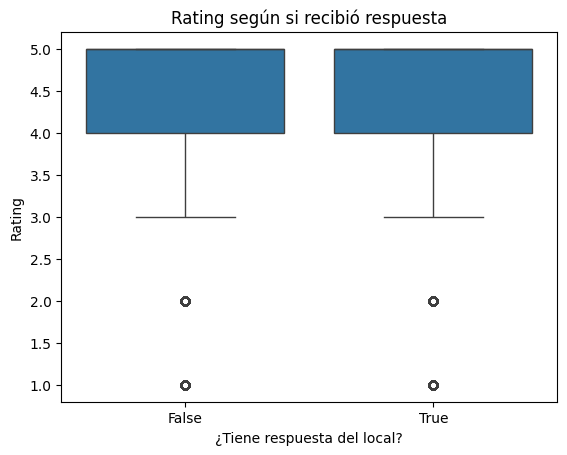

In [21]:
df['tiene_resp'] = df['resp'].notna()
sns.boxplot(x='tiene_resp', y='rating', data=df)
plt.title("Rating según si recibió respuesta")
plt.xlabel("¿Tiene respuesta del local?")
plt.ylabel("Rating")
plt.show()

Análisis:

No se muestra diferencias en la variacion de rating y la respuesta recibida

# Análisis de Review

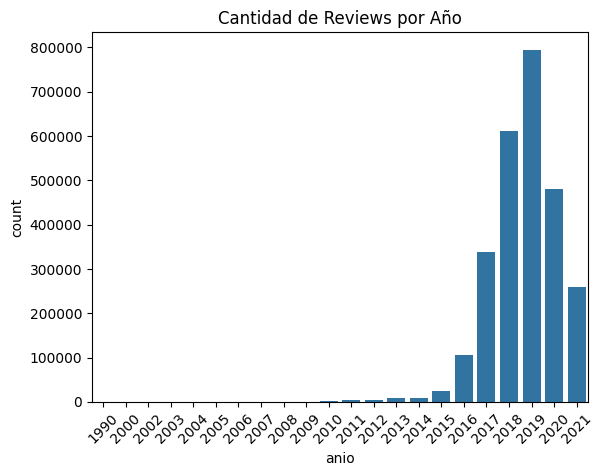

In [22]:
df['anio'] = df['fecha'].dt.year
sns.countplot(x='anio', data=df)
plt.title('Cantidad de Reviews por Año')
plt.xticks(rotation=45)
plt.show()

In [23]:
# Asegurate de tener la columna 'anio' creada desde la fecha
df['fecha'] = pd.to_datetime(df['time'], unit='ms')
df['anio'] = df['fecha'].dt.year

# Contar reviews por año
reviews_por_anio = df['anio'].value_counts().sort_index()

# Crear la tabla
tabla_reviews_anio = pd.DataFrame({
    'Año': reviews_por_anio.index,
    'Cantidad de Reviews': reviews_por_anio.values
})

# Mostrar la tabla
print(tabla_reviews_anio)

     Año  Cantidad de Reviews
0   1990                   35
1   2000                    1
2   2002                   21
3   2003                   29
4   2004                   70
5   2005                  144
6   2006                  166
7   2007                  148
8   2008                  201
9   2009                  258
10  2010                 1397
11  2011                 3755
12  2012                 4273
13  2013                 7914
14  2014                 9022
15  2015                23731
16  2016               105411
17  2017               338266
18  2018               611705
19  2019               794583
20  2020               480011
21  2021               259522


Análisis:

Se muestra un fuerte crecimiento desde 2016, con picos en 2018 y 2019.
Máximo en 2019: más de 790.000 reviews.
Caída en 2020 y 2021, posiblemente relacionada con la pandemia (COVID-19 afectó la movilidad y el turismo).
Antes de 2016, el volumen de reseñas era muy bajo.

In [24]:
total_reviews = len(df)

text_count = df['text'].notna().sum()
pics_count = df['pics'].notna().sum()
resp_count = df['resp'].notna().sum()

print(f"Reviews con texto: {text_count} ({(text_count / total_reviews * 100):.2f}%)")
print(f"Reviews con fotos: {pics_count} ({(pics_count / total_reviews * 100):.2f}%)")
print(f"Reviews con respuesta: {resp_count} ({(resp_count / total_reviews * 100):.2f}%)")

Reviews con texto: 1481527 (56.10%)
Reviews con fotos: 96734 (3.66%)
Reviews con respuesta: 257800 (9.76%)


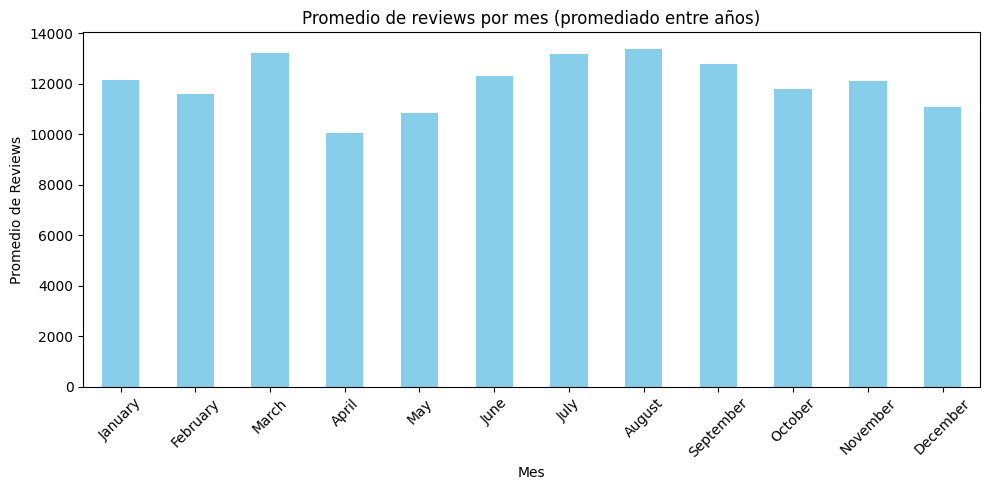

In [25]:
# Asegurar que las fechas están en formato datetime
df['fecha'] = pd.to_datetime(df['time'], unit='ms')
df['anio'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month

# Agrupar por año y mes para contar reviews
grupo_anio_mes = df.groupby(['anio', 'mes']).size().reset_index(name='cantidad')

# Calcular promedio de reviews por mes (promediado entre años)
promedio_por_mes = grupo_anio_mes.groupby('mes')['cantidad'].mean()

# Asegurar que estén los 12 meses
promedio_por_mes = promedio_por_mes.reindex(range(1, 13), fill_value=0)



# Graficar
plt.figure(figsize=(10, 5))
promedio_por_mes.plot(kind='bar', color='skyblue')
plt.title("Promedio de reviews por mes (promediado entre años)")
plt.xlabel("Mes")
plt.ylabel("Promedio de Reviews")
plt.xticks(ticks=range(12), labels=[calendar.month_name[m] for m in range(1, 13)], rotation=45)
plt.tight_layout()
plt.show()

In [26]:
# Crear DataFrame con nombres de mes
tabla_reviews_mes = pd.DataFrame({
    'Mes': [calendar.month_name[m] for m in promedio_por_mes.index],
    'Promedio de Reviews': promedio_por_mes.values.round(2)
})

# Mostrar la tabla
print(tabla_reviews_mes)

          Mes  Promedio de Reviews
0     January             12158.37
1    February             11593.84
2       March             13229.94
3       April             10056.68
4         May             10826.65
5        June             12299.11
6        July             13194.72
7      August             13374.67
8   September             12805.82
9     October             11795.61
10   November             12096.47
11   December             11077.95


Análisis:

Actividad moderada en todo el año
Aunque no hay picos extremos, marzo, julio y aghosto muestran una actividad más fuerte en promedio.

Mes más bajo: abril 
Este mes tienden a tener menos reseñas en comparación con otros. Esto podría deberse a temporada baja de turismo o consumo, condiciones climáticas o feriados que afectan el tráfico de personas.

No hay una estacionalidad clara y marcada
La diferencia entre los meses no es tan extrema como para pensar en una única temporada fuerte. Es una distribución relativamente estable, pero con altibajos sutiles.